# Project Introduction

The dataset is for customers of treadmill products of a retail store called Cardio Good Fitness.  The dataset contains the following variables:

    *Product - the model no. of the treadmill
    *Age - in no of years, of the customer
    *Gender - of the customer
    *Education - in no. of years, of the customer
    *Marital Status - of the customer
    *Usage - Avg. # times the customer wants to use the treadmill every week
    *Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
    *Income - of the customer
    *Miles- expected to run

## Goal of the Project

    1.Come up with a customer profile(characteristics of a customer) for each of the different       products
    2.Perform uni-variate and multi-variate analyses on the dataset
    3. Generate a set of insights and recommendations that will help the company in targeting       new customers
    
### Project Considerations

The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.

The notebook should be run from start to finish in a sequential manner before submission.
It is preferable to remove all warnings and errors before submission.

The notebook should be submitted as an HTML file (.html) and NOT as a notebook file (.ipynb) 




### Loading the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

### Importing The Data

In [2]:
#importing the csv data and assigning it to a variable called df
df = pd.read_csv('CardioGoodFitness.csv')

### Inspection of the data and comments

In [3]:
#check the first 5 top rows of the dataset
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
#check the bottom 5 rows of the dataset
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [5]:
#view the columns in the dataset and datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
#Check if there are any values that are notnull  and sum 
df.notnull().sum()

Product          180
Age              180
Gender           180
Education        180
MaritalStatus    180
Usage            180
Fitness          180
Income           180
Miles            180
dtype: int64

In [7]:
#check all columns for missing values and sum
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [8]:
#view the number of different items in the product column and their quantity
df['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

In [9]:
#view the different kind of values in the column and quantity
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [10]:
df.describe(exclude='number').T

,count,unique,top,freq
Product,180,3,TM195,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


In [11]:
## view statistics of the overall dataset

df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [12]:
## Create a new dataframe and assign only the column 'Age' to it
df1 = df['Age']

/Users/johanbotha/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


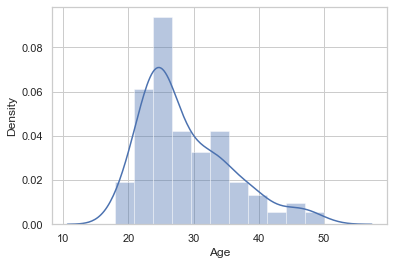

In [13]:
## create a histogram/distribution plot using the new dataframe with only the Age column to 
## determine the distribution of the different ages in the dataset.
sns.distplot(df1);

In [14]:
#get central statistics about the income of custonmers
df['Income'].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

In [15]:
# determine the difference between the max income and minimum income of customers ie: range
min_income = df['Income'].max()
max_income = df['Income'].min()

max_income - min_income

-75019

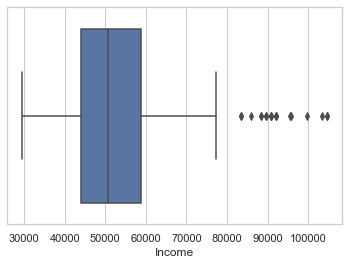

In [16]:
# check the income distribution of customers and to determine if there are any outliers

box = sns.boxplot(x=df['Income'])

In [17]:
#Determine the number of female customers in the dataset
print((len(df[df['Gender'] == 'Female'])))

76


In [18]:
# Determine the number of male customers in the dataset
print((len(df[df['Gender'] == 'Male'])))

104


In [19]:
#Determine the percentage of customers in the dataset that are female
PerFemale = (len(df[df['Gender'] == 'Female'])) / df.shape[0]
print('Percentage of customers that are female ' + str(PerFemale))

Percentage of customers that are female 0.4222222222222222


In [20]:
#create a summary displaying the correlation between the various variables in the dataset`

df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


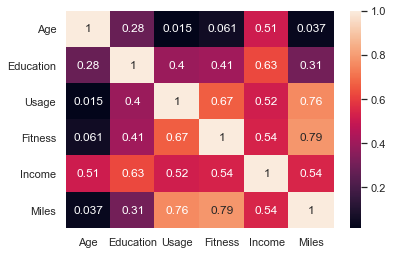

In [21]:
#show the correlation between variables on a heatmap

sns.heatmap(df.corr(), annot=True);

In [22]:
# group the data in the dataset by product and determine the mean of customers for each product
df.groupby(by='Product').mean()

,Age,Education,Usage,Fitness,Income,Miles
Product,,,,,,
TM195,28.55,15.037500,3.087500,2.9625,46418.025,82.787500
TM498,28.90,15.116667,3.066667,2.9000,48973.650,87.933333
TM798,29.10,17.325000,4.775000,4.6250,75441.575,166.900000



## Intial observations
The 'Product' column should be of type category as their are different categories of products in the dataset.

Gender should be of type category

'MaritalStatus' should be of type category in the dataset.

There are only 3 types of products in the dataset

TM195    
TM498    
TM798

The mean age of the people in the dataset looks to be between 25-28 in age.
Minimum income in the dataset is 29562 and the max income is 104581  with the mean income being 53719.58

####  General Insights made from Inspection
<li>The majority of people in the dataset are married or in a relationship in the dataset.  this is initially   
    suggesting there is more interest in the treadmills from people already in a relationship

<li>There are some customers that are outliers in the income column and receive almost double the mean salary

<li>More than 50% of customers in the dataset for the treadmills are male.  This will suggest that to increase sales 
    the company needs to focus on males</li>

<li>The company should look at targetting individuals between the ages of 23 and 28 as that seems to be majority of customers from the company
    
<li>Individuals that regard themselves as fit will be more interested in the treadmills instead of targetting couch potatoes
<li>The customers of the store are also educated
<li>The most popular treadmill in the dataset is the TM195 as the majority of the users are interested in this product.  The second most popular is the TM498 and the least popular is the TM798
<li> The income of users of the TM195 is significantly less than the income of customers using the TM798 treadmill.  This would suggest that the store should focus on marketing the TM798 to the higher income groups.  I am also inclined to believe this is the top model in the range as the upper class will be more inclined to spend more money on the top products.


## Investigate Dataset for Profile of TM195  Treadmill users

In [23]:
#Determine the % of customers that purchased the TM195 Treadmil

tm1 = (df[df['Product'] == 'TM195'])

len(tm1) / df.shape[0]

0.4444444444444444

In [24]:
#Determine the % of customers that bought the TM195 that are male
tm1g = (tm1[tm1['Gender'] == 'Male'])
len(tm1g) / tm1.shape[0]

0.5

In [25]:
#Calculate the % of customers in the dataset that bought the TM195 and are female
tm1gf = (tm1[tm1['Gender'] == 'Female'])
len(tm1gf) / tm1.shape[0]

0.5

In [26]:
#determine the mean income for users of the TM195 treadmil
tm1['Income'].mean()

46418.025

In [27]:
#determine the mean age of users of the TM195 treadmil
tm1['Age'].mean()

28.55

In [28]:
#determine the fitness level of TM195 users
tm1['Fitness'].mean()

2.9625

<AxesSubplot:xlabel='Income', ylabel='Age'>

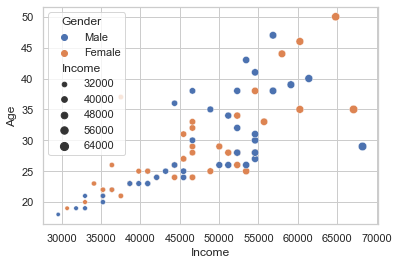

In [29]:
#compare the income and age of users of the TM195 treadmil
sns.scatterplot(data=tm1, x='Income', y='Age', hue='Gender', size='Income')

<AxesSubplot:xlabel='Income', ylabel='Age'>

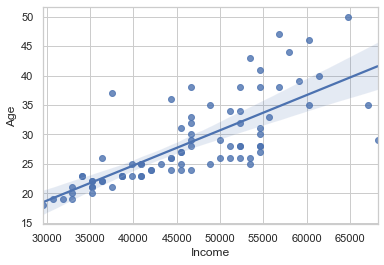

In [30]:
#use a regplot to see correlation between income and age
sns.regplot(data=tm1, x='Income', y='Age')

<AxesSubplot:xlabel='Gender', ylabel='Age'>

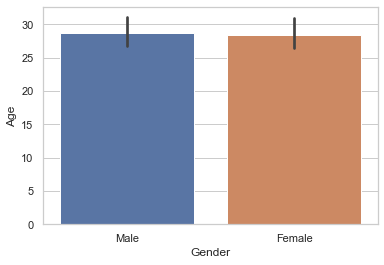

In [31]:
#create a barplot to see the number of male and female users and their age range for the TM195 product
sns.barplot(x='Gender', y='Age', data=tm1)

In [32]:
#determine the number of users in the dataset that bought the TM195 that are in a relationship
len(tm1[(tm1['MaritalStatus'] == 'Partnered')])

48

In [33]:
#determine number of customers that bought the TM195 that are single
len(tm1[(tm1['MaritalStatus'] == 'Single')])

32

In [34]:
#determine average fitness of TM195 users
tm1['Fitness'].mean()

2.9625

In [35]:
#determine average usage of TM195 users
tm1['Usage'].mean()

3.0875

### Investigate Dataset for Profile of TM498 Treadmill users

In [36]:
#Determine the % of customers that purchased the TM498 Treadmil
tm2 = (df[df['Product'] == 'TM498'])
len(tm2) / df.shape[0]

0.3333333333333333

In [37]:
tm2gf = (tm2[tm2['Gender'] == 'Female'])
len(tm2gf) / tm2.shape[0]

0.48333333333333334

In [38]:
tm2gm = (tm2[tm2['Gender'] == 'Male'])
len(tm2gm) / tm2.shape[0]

0.5166666666666667

In [39]:
tm2['Income'].mean()

48973.65

In [40]:
tm2['Age'].mean()

28.9

<AxesSubplot:xlabel='Income', ylabel='Age'>

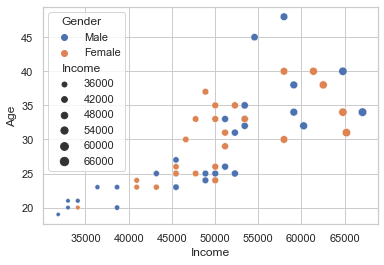

In [41]:
sns.scatterplot(data=tm2, x='Income', y='Age', hue='Gender', size='Income')

<AxesSubplot:xlabel='Income', ylabel='Age'>

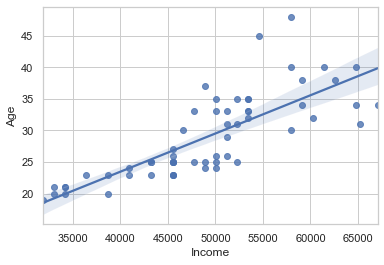

In [42]:
sns.regplot(data=tm2, x='Income', y='Age')

<AxesSubplot:xlabel='Gender', ylabel='Age'>

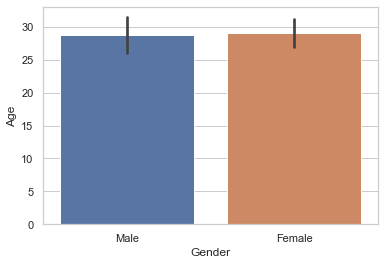

In [43]:
sns.barplot(x='Gender', y='Age', data=tm2)

In [44]:
len(tm2[(tm2['MaritalStatus'] == 'Single')])

24

In [45]:
len(tm2[(tm2['MaritalStatus'] == 'Partnered')])

36

### Investigate Dataset for Profile of TM798 users

In [46]:
#Determine the % of customers that purchased the TM798 Treadmil
tm3 = (df[df['Product'] == 'TM798'])
len(tm3) / df.shape[0]

0.2222222222222222

In [47]:
tm3gm = (tm3[tm3['Gender'] == 'Male'])
len(tm3gm) / tm3.shape[0]

0.825

In [48]:
tm3gf = (tm3[tm3['Gender'] == 'Female'])
len(tm3gf) / tm3.shape[0]

0.175

In [49]:
tm3['Income'].mean()

75441.575

In [50]:
tm3['Age'].mean()

29.1

<AxesSubplot:xlabel='Income', ylabel='Age'>

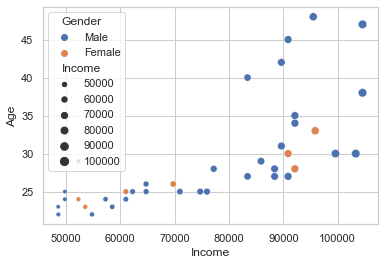

In [51]:
sns.scatterplot(data=tm3, x='Income', y='Age', hue='Gender', size='Income')

<AxesSubplot:xlabel='Income', ylabel='Age'>

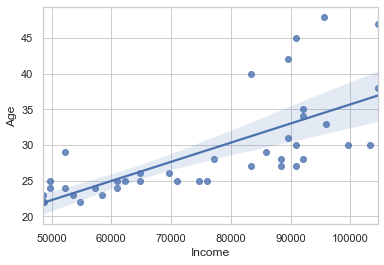

In [52]:
sns.regplot(data=tm3, x='Income', y='Age')

<AxesSubplot:xlabel='Gender', ylabel='Age'>

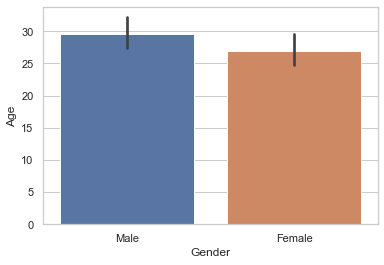

In [53]:
sns.barplot(x='Gender', y='Age', data=tm3)

In [54]:
len(tm3[(tm3['MaritalStatus'] == 'Single')])

17

In [55]:
len(tm3[(tm3['MaritalStatus'] == 'Partnered')])

23